In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib.colors import ListedColormap

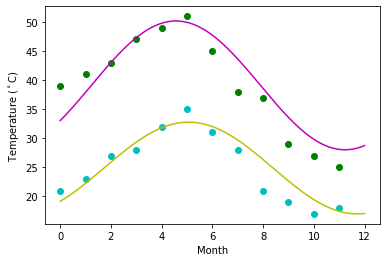

In [2]:
# Scipy

Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
months =  np.arange(12)

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, Max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, Min, [-40, 20, 0])

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, Min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

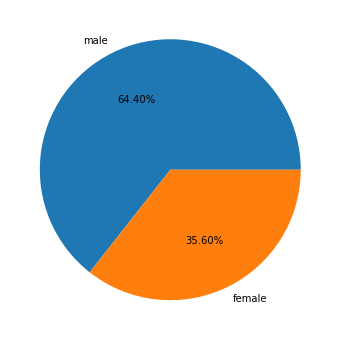

In [3]:
# Matplotlib

url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
fig = plt.figure(figsize =(6,6))
plt.pie(titanic.sex.value_counts(),labels = ('male','female'), autopct ='%1.2f%%')
plt.show()

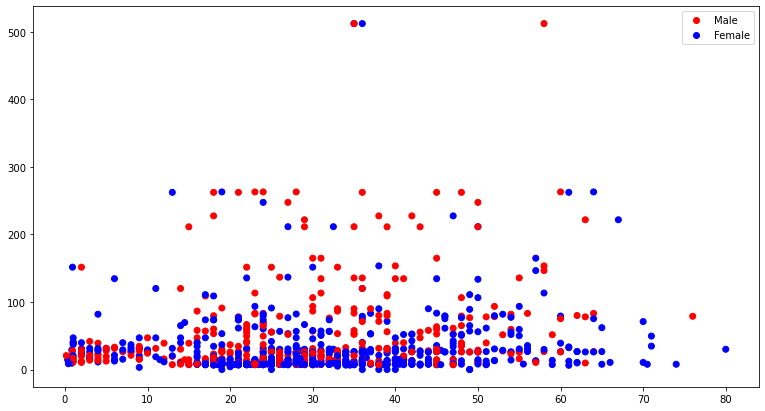

In [5]:
fig = plt.figure(figsize =(13,7))
s = plt.scatter(titanic['age'],titanic['fare'], c=pd.factorize(titanic['sex'])[0], cmap=ListedColormap(['r','b']))
plt.legend(handles=s.legend_elements()[0], labels=['Male', 'Female'])

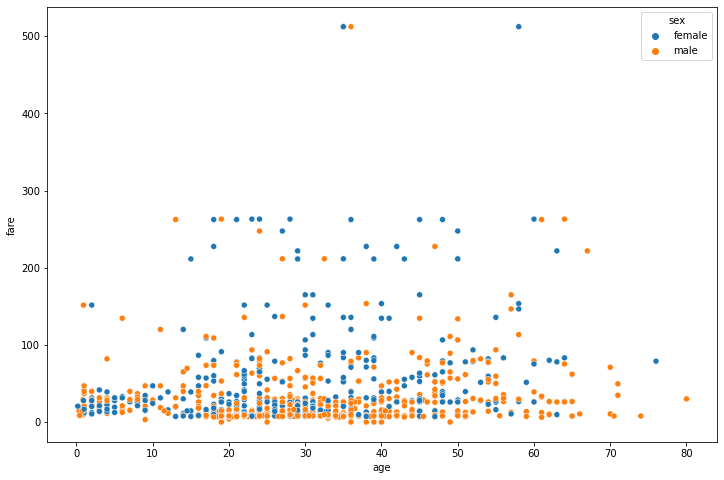

In [8]:
import seaborn as sns

plt.figure(figsize=(12, 8))
ax=sns.scatterplot(x='age', y='fare', hue='sex', data=titanic, alpha=1)